## Gradients and edge detection <br>

Usage: to detecting edges in images and allows us to find contours and outlines of objects in images.<br>
Histogram Oriented Gradients and SIFT are built upon image gradient representations. <br>
Edges corresponds to: <br>
Boundaries of an object in an image;<br>
Boundaries of shadowing or lighting conditions in an image;<br>
Boundaries of "parts" within object.<br>
Image gradient is defined as a directional change in image intensity.<br>
Image gradient are estimated using kernels and main goal is to find the change in directiont to the central pixel.<br>


In [1]:
import numpy as np
import imutils
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Sobel kernel 

def sobel( file ):
    #convert to greyscale image
    image = cv2.imread(file)
    gray = cv2.cvtColor( image, cv2.COLOR_BGR2GRAY )
    plt.figure()
    plt.imshow(gray)
    #compute gradients along x and y axis;
    gX = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=1, dy=0 )
    gY = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=0, dy=1 )
    #convert back to unsinged 8-bit integer
    gX = cv2.convertScaleAbs(gX)
    gY = cv2.convertScaleAbs(gY)
    plt.figure()
    plt.imshow(gX)
    plt.figure()
    plt.imshow(gY)
    #combine the sobel X and Y representations into a single image;
    sobelCombined = cv2.addWeighted(gX, 0.5, gY, 0.5 , 0 )
    
    #show outputimages
    #plt.figure()
    #plt.imshow(gX)
    
    plt.figure()
    plt.imshow(gY)
    plt.imshow(sobelCombined)
    
    

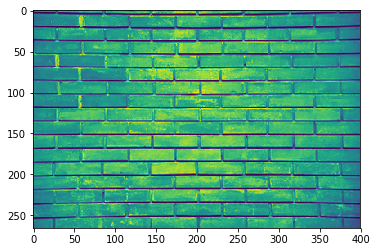

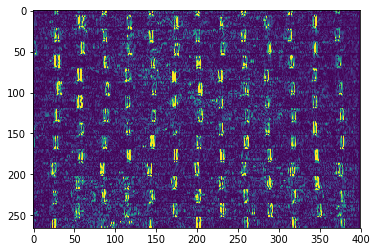

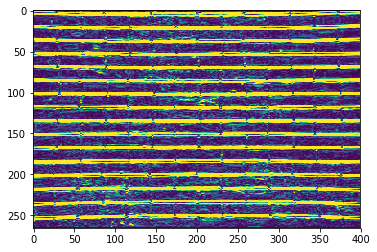

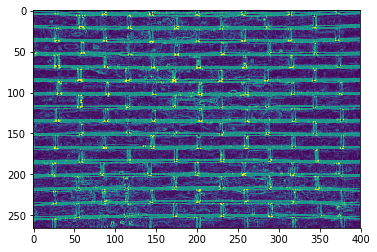

In [3]:
file="/mnt/c/cnn_dl/data/bricks.png"
sobel(file)

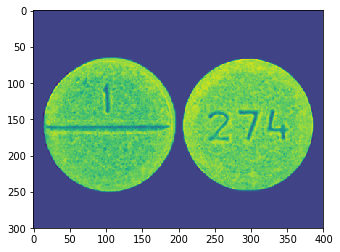

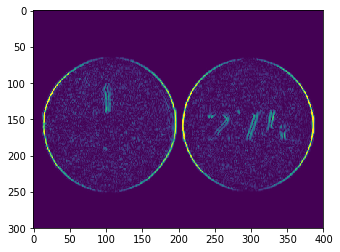

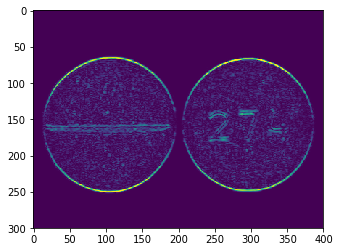

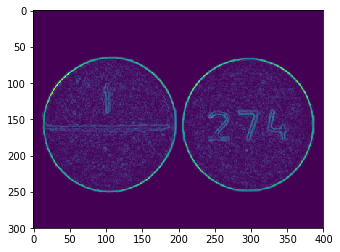

In [4]:
file_tab='/mnt/c/cnn_dl/data/clonazepam_1mg.png'
sobel(file_tab)

In [5]:
def mag_orientation(file, lower_angle=175.0, upper_angle=180.0 ):
    image = cv2.imread(file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.figure()
    plt.imshow(gray)
    
    #compute gradients along x and y axis,
    gX = cv2.Sobel(gray, cv2.CV_64F, 1,0)
    gY = cv2.Sobel(gray, cv2.CV_64F, 0, 1 )
    
    #compute the gradient magnitude and orientaion respectively;
    mag = np.sqrt(( gX ** 2 ) + ( gY ** 2 ))
    orientation = np.arctan2(gY,gX) * ( 180/np.pi) % 180
    
    #find all pixels that are within the upper and low angle boundaries
    idxs = np.where( orientation >= lower_angle , orientation, -1 )
    idxs = np.where( orientation <= upper_angle, idxs, -1 )
    mask = np.zeros( gray.shape, dtype="uint8")
    mask[idxs > -1 ] = 55
    plt.figure()
    plt.imshow(mask)

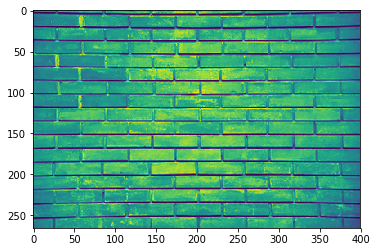

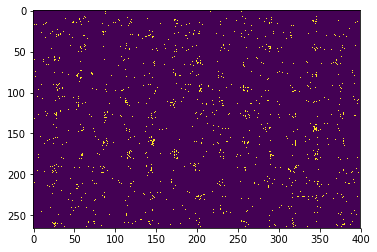

In [6]:
file_coin='/mnt/c/cnn_dl/data/coins01.png'
mag_orientation(file)

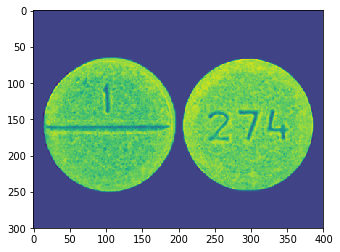

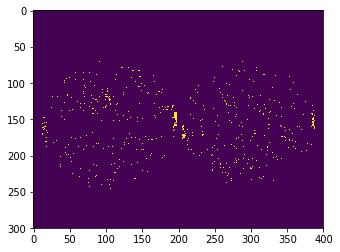

In [7]:
mag_orientation(file_tab) #observation: pixels fall between 175<=angle<=180

## Edge Detection <br>
Canny edge detector is well used im computer vision and image processing.<br>
cv2.Canny() <br>
The process of edge detection, the gradient magnitude is extremely sensitive to noise.<br>

<br>
Canny in a nutshell:<br>
1. Apply Gaussian smoothing to reduce the noise.<br>
2. Compute the Gx and Gy image gradients usig the Sobel kernel.<br>
3. Applying non-maxima suppression to keep only the local maxima of gradient magnitude pixles that are pointing in the direction of the gradient.<br>
   This is simple edge thinning process.
4. Define and apply the Tupper and Tlower thresholds for Hypersis thresholding.<br>



In [8]:

def canny(file):
    image = cv2.imread(file)
    gray = cv2.cvtColor( image, cv2.COLOR_BGR2GRAY )
    blurred = cv2.GaussianBlur(gray, (5,5), 0 )
    
    #show original and blurred images
    plt.figure()
    plt.imshow(gray)
    plt.figure()
    plt.imshow(blurred)
    
    #compute a wide, mid-rangea and tight threshold for the edges
    wide = cv2.Canny(blurred, 10, 200 )
    mid = cv2.Canny( blurred, 30, 150 )
    tight = cv2.Canny( blurred, 240, 250 )
    
    #show the edges maps
    plt.figure()
    plt.imshow( wide )
    plt.figure()
    plt.imshow( mid )
    plt.figure()
    plt.imshow( tight )
    
    

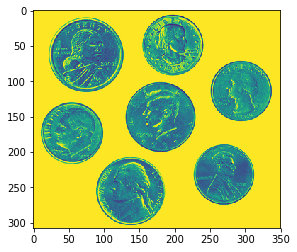

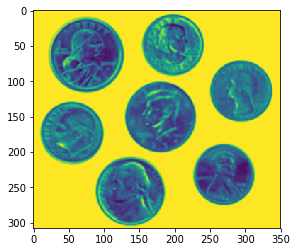

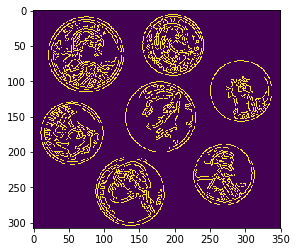

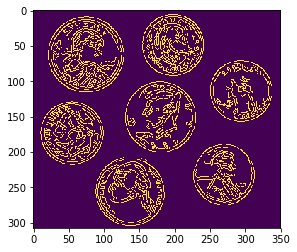

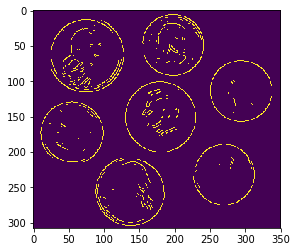

In [9]:
canny( file_coin )

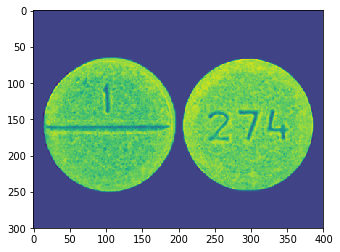

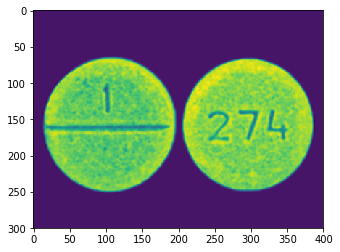

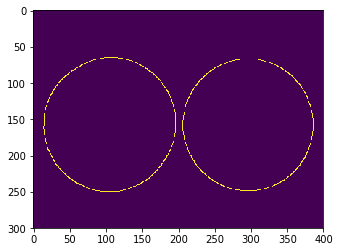

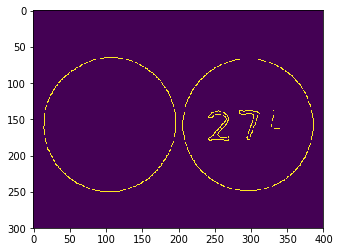

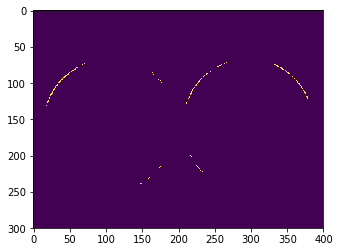

In [10]:

canny(file_tab)

**Problem** is determining the lower and upper thresholds.<br>
Solution is Automatically tuning edge detection parameters using statistics<br>

In [11]:
#imutils.py 
# this is how auto_canny looks inside the imutils packages;
#

def auto_canny( image, sigma=0.33 ):
    #compute the median of the single channel pixel intensities
    c = np.median(image)
    
    #apply automatic cann edge detection using the computed median
    lower = int(max(0, (1.0 - sigma )* v))
    upper = int(min(255, (1.0 + sigma )*v))
    edged = cv2.Canny( image, lower, upper )
    
    return edged




In [14]:
def auto_canny(file):
    
    image = cv2.imread(file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY )
    blurred = cv2.GaussianBlur(gray, (3,3), 0 )
    plt.figure()
    plt.imshow(gray)
    #apply canny edge detection a wide threshold, tight threshold and automcatically determined threshold
    wide = cv2.Canny(blurred, 10, 200 )
    tight = cv2.Canny( blurred, 225, 250 )
    auto = imutils.auto_canny(blurred)
    
    plt.figure()
    plt.imshow(wide)
    plt.figure()
    plt.imshow(tight)
    plt.figure()
    plt.imshow(auto)

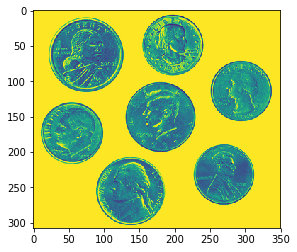

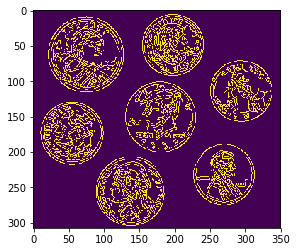

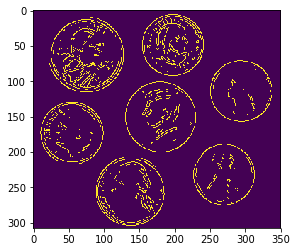

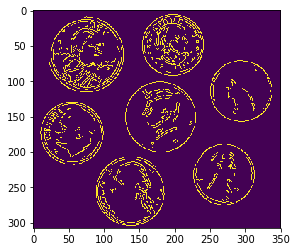

In [15]:
auto_canny( file_coin )